### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [2]:
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
#from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#Build graph

keras.backend.clear_session()

model = keras.models.Sequential()

x_train = x_train/255
y_train = y_train/255

x_train = x_train.reshape((-1,28,28))
x_test = x_test.reshape((-1,28,28))

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          epochs=10,batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', 
          patience=5, mode='auto')]
         )

W0616 11:38:37.762207 139912353625984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0031 - acc: 0.7261 - val_loss: 0.7774 - val_acc: 0.7257
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.0019 - acc: 0.8253 - val_loss: 0.9114 - val_acc: 0.7243
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0017 - acc: 0.8398 - val_loss: 0.9032 - val_acc: 0.7220
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0017 - acc: 0.8464 - val_loss: 0.9850 - val_acc: 0.7263
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0016 - acc: 0.8559 - val_loss: 1.0591 - val_acc: 0.7058
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0015 - acc: 0.8632 - val_loss: 0.9525 - val_acc: 0.7364


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
    )

### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

W0616 12:57:33.399939 139912353625984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0616 12:57:33.414346 139912353625984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0616 12:57:33.428118 139912353625984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0616 12:57:33.442260 139912353625984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0616 12:57:33.457116 139912353625984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


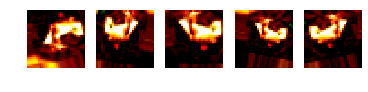

In [37]:
from matplotlib import pyplot as plt
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()